# Simulación Montecarlo
> El método de Montecarlo es un método no determinista o estadístico numérico, usado para aproximar expresiones matemáticas complejas y costosas de evaluar con exactitud. El método se llamó así en referencia al Casino de Montecarlo (Mónaco) por ser “la capital del juego de azar”, al ser la ruleta un generador simple de números aleatorios. El nombre y el desarrollo sistemático de los métodos de Montecarlo datan aproximadamente de 1944 y se mejoraron enormemente con el desarrollo de la computadora.

Referencia:
- https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo

___
## 1. Introducción

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/5/54/Monte_carlo_method.svg" width="300px" height="100px" />

- Inventado por Stanislaw Ulam y a John von Neumann. Ulam ha explicado cómo se le ocurrió la idea mientras jugaba un solitario durante una enfermedad en 1946. 
- Advirtió que resulta mucho más simple tener una idea del resultado general del solitario haciendo pruebas múltiples con las cartas y contando las proporciones de los resultados que computar todas las posibilidades de combinación formalmente.
- Se le ocurrió que esta misma observación debía aplicarse a su trabajo de Los Álamos sobre difusión de neutrones, para la cual resulta prácticamente imposible solucionar las ecuaciones íntegro-diferenciales que gobiernan la dispersión, la absorción y la fisión.
- Dado que ya  empezaban a estar disponibles máquinas de computación para efectuar las pruebas numéricas, el método cobró  mucha fuerza.
- El método de Montecarlo proporciona soluciones aproximadas a una gran variedad de problemas matemáticos posibilitando la realización de experimentos con muestreos de números pseudoaleatorios en una computadora. El método es aplicable a cualquier tipo de problema, ya sea estocástico o determinista. 
- El método de Montecarlo tiene un error absoluto de la estimación que decrece como $\frac{1}{\sqrt{N}}$ en virtud del teorema del límite central.

### Ejemplo
Todos alguna vez hemos aplicado el método Montecarlo (inconscientemente). Como ejemplo, consideremos el juego de Astucia Naval.

Normalmente, primero se realizan una serie de tiros a puntos aleatorios. Una vez se impacta en un barco, se puede utilizar un algoritmo determinista para identificar la posición del barco y así terminar de derrumbarlo.



___
## 2. Caminata aleatoria
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/da/Random_Walk_example.svg" width="300px" height="100px" />

Una caminata aleatoria (*random walk* en inglés) es una formalización matemática de la trayectoria que resulta al hacer pasos sucesivos aleatorios. Un ejemplo elemental de caminata aleatoria es la caminata aleatoria en la línea de números enteros $\mathbb{Z}$, la cual comienza en $0$ y en cada paso se mueve $+1$ o $-1$ con igual probabilidad.

Otros ejemplos:
- Trayectoria de una molécula al viajar en un fluido (líquido o gas).
- El camino que sigue un animal en su búsqueda de comida.
- El precio fluctuante de una acción.
- La situación de un apostador en un juego de azar.

Todos pueden ser aproximados por caminatas aleatorias, aunque no sean en verdad procesos aleatorios.

### Caminata aleatoria en una dimensión
Como dijimos, un ejemplo elemental de caminata aleatoria es la caminata aleatoria en la línea de números enteros $\mathbb{Z}$, la cual comienza en $0$ y a cada paso se mueve $+1$ o $-1$ con igual probabilidad.

Esta caminata se puede ilustrar como sigue:
- Se posiciona en $0$ en la línea de números enteros y una moneda justa se tira.
- Si cae en **sol** nos moveremos una unidad a la derecha.
- Si cae en **águila** nos moveremos una unidad a la izquierda.

Notemos que después de $5$ pasos podremos estar en 1, −1, 3, −3, 5, or −5. Las posibilidades son las siguientes:

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/05/Flips.svg" width="900px" height="300px" />


Referencia:
- https://en.wikipedia.org/wiki/Random_walk

**Importante:** librería random.

Referencia:
- https://docs.python.org/3/library/random.html

## Caminata aleatoria

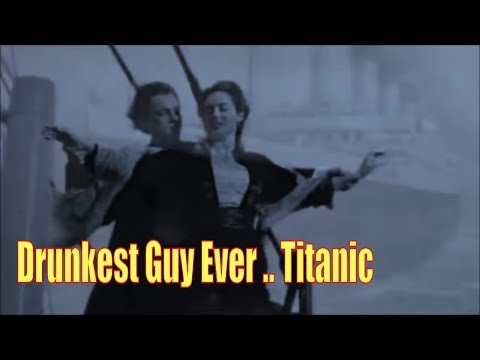

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Y77WnkLbT2Q')

## ¿Qué es una simulación montecarlo?

Revisitamos el concepto de simulación montecarlo.

> La idea de una simulación montecarlo es probar muchos resultados posibles. En la realidad, solo uno de esos resultados posibles se dará, pero, en términos de evaluación de riesgos, cualquiera de las posibilidades podría ocurrir.

Los simuladores montecarlo se usan usualmente para evaluar el riesgo de una estrategia de negocios dada con opciones y acciones.

Los simuladores montecarlo pueden ayudar a tomar decisiones exitosas, y que el resultado de una decisión no sea la única medida de si dicha decisión fue buena. Las decisiones no deben ser evaluadas después del resultado. Por el contrario, los riesgos y beneficios solo deben ser considerados en el momento en que se debe tomar la decisión, sin prejuicios retrospectivos. Un **simulador montecarlo puede ayudar a visualizar muchos (o en algunos casos, todos) de los resultados potenciales** para tener una mejor idea de los riesgos de una decisión.


### Usamos montecarlo para evaluar el resultado de la caminata aleatoria

- Ver el valor esperado de la caminata después de N pasos.

- Luego, evaluar el proceso utilizando montecarlo y comparar resultados.

In [2]:
# Hacer código acá
import random
import numpy as np
import matplotlib.pyplot as plt 
from functools import reduce

In [3]:
# Caminata aleatoria método convencional
# Crear una función que te regrese todo el recorrido de una caminata aleatoria empezando desde 0
def randon_walk(N):
    x0 = 0
    x = [x0]
    for i in range(N):
        rnd = np.random.choice([1, -1])
        x.append(x[-1] + rnd)    

    return x

randon_walk(10)

[0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2]

In [4]:
rnd = np.random.choice([1, -1], 5)
rnd

array([-1,  1, -1,  1,  1])

In [5]:
# Caminata aleatoria vectorizada
def randon_walk_vect(N):
    x0 = 0
    x = np.random.choice([1, -1], N)
    x[0] = x0
    return x.cumsum()
randon_walk_vect(10)

array([ 0, -1,  0,  1,  2,  3,  2,  3,  2,  3], dtype=int32)

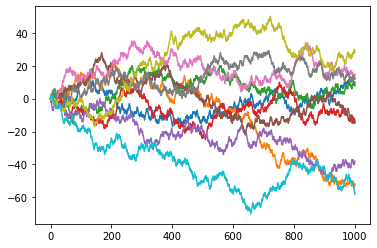

In [6]:
# Usando el método ineficiente

N = 1000 # número de pasos
n = 10    # cantidad de trayectorias
np.random.seed(2)
tray1 = np.array([randon_walk(N) for i in range(n)])
plt.plot(tray1.T);
#print('En promedio el caminante esta en :',np.mean(final))

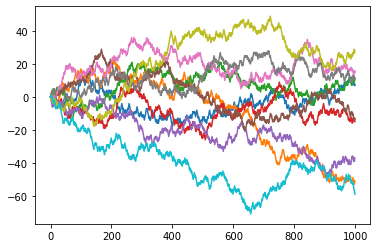

In [7]:
# Usando el método vectorizado
np.random.seed(2)
N = 1000 # número de pasos
n = 10    # cantidad de trayectorias
x0 = 0    # Condición inicial

# np.asmatrix
tray2 = np.array([randon_walk_vect(N) for i in range(n)])
plt.plot(tray2.T);


## Ejemplo

Ahora analicemos el ejemplo básico del apostador.

Referencia:
- https://pythonprogramming.net/monte-carlo-simulator-python/

Supongamos que estamos en un casino especial, donde el usuario puede tirar un *dado metafórico* que puede dar como resultado un número del uno (1) al número cien (100).

Si el usuario tira cualquier número entre 1 y 50, el casino gana. Si el usuario tira cualquier número entre 51 y 99, el usuario gana. Si el usuario tira 100, pierde.

Con esto, el casino mantiene un margen del 1%, el cual es mucho más pequeño que el margen típico en casinos, al igual que el margen de mercado cuando se incorporan costos por transacción.

Por ejemplo, [Scottrade](https://www.scottrade.com/) cobra $\$7$ USD por transacción. Si se invierten $\$1000$ USD por acción, esto significa que tienes que pagar $\$7$ USD para entrar, y $\$7$ USD para salir, para un total de $\$14$ USD.

Esto pone el margen en <font color ='red'> $1.4\%$ </font>. Esto significa, que a largo plazo, las ganancias tienen que ser mayores a $1.4\%$ en promedio, de otra manera se estará perdiendo dinero. 

De nuevo, con nuestro ejemplo en mente, 1-50, la casa gana. 51-99 el usuario gana. Un 100 significa que la casa gana.

Ahora, comencemos. Primero tenemos que crear nuestro dado.

In [8]:
# Crear una función para que devuelva simplemente ganar(true) o perder(false)
def dado():
    x = np.random.randint(1,101)
    if 0<x<=50 or x == 100:
        return False
    else:
        return True

In [9]:
dado()


False

In [10]:
# Probar la función creada para ver que funcione
N = 1000000
juegos = [dado() for i in range(N)]
contador_ganar = sum(juegos)
contador_perder = N - contador_ganar

print("Ganamos", contador_ganar, " veces y perdimos", contador_perder, " veces.")
print("Probabilidad de ganar:", 100 * contador_ganar / N, "%")

Ganamos 489645  veces y perdimos 510355  veces.
Probabilidad de ganar: 48.9645 %


Ahora, necesitamos crear un **apostador**. Empezaremos con uno extremadamente básico por ahora. Veremos, que aún con un apostador muy básico, veremos cosas muy reveladoras usando un simulador montecarlo.

In [11]:
# Comando para interactuar con las gráficas
# %matplotlib notebook

# Comando para no interactuar mas con las gráficas
%matplotlib inline

# Forma ineficiente

In [12]:
# Crearemos un apostador simple MÉTODO CONVENCIONAL
# Las caracterísitcas son: se empieza con un capital inicial,
# siempre se apuesta lo mismo, y se va a apostar un número determinado de veces.
def apostador2(cap_inicial, apuesta, n_apuestas):
    np.random.seed(516)
    capital = cap_inicial
    c_capital = [capital]
    for i in range(n_apuestas-1):
        if dado():
            capital += apuesta
            c_capital.append(capital)
        else:
            capital -= apuesta
            c_capital.append(capital)
    return c_capital

# Forma eficiente

In [13]:
# Crearemos un apostador simple VECTORIZADOA ----- FUNCIÓN ANIDADA
# Las caracterísitcas son: se empieza con un capital inicial,
# siempre se apuesta lo mismo, y se va a apostar un número determinado de veces.
def apostador_nested_f(cap_inicial, apuesta, n_apuestas):
    np.random.seed(516)
    c_capital = np.zeros(n_apuestas)
    c_capital[0] = cap_inicial 
    
    def llenar_vector(i):
        nonlocal c_capital
        c_capital[i + 1] = c_capital[i] + apuesta if dado() else c_capital[i] - apuesta   
    [llenar_vector(i) for i in range(n_apuestas - 1)]

    return c_capital    

apostador_nested_f(10000, 100, 10)

array([10000., 10100., 10200., 10300., 10200., 10100., 10000., 10100.,
       10000.,  9900.])

In [14]:
# Crearemos un apostador simple VECTORIZADO
# Proponer otra forma de obtener el mismo resultado
#(CUMSUM)
def apostador_vect(cap_inicial, apuesta, n_apuestas):
    np.random.seed(516)
    c_capital = np.array([apuesta if dado() else -apuesta for i in range(n_apuestas)])  
    c_capital[0] = cap_inicial
    
    
    return c_capital.cumsum()

apostador_vect(10000, 100, 10)

array([10000, 10100, 10200, 10100, 10000,  9900, 10000,  9900,  9800,
        9700], dtype=int32)

### 1. Probar tu función `apostador2`

El capital al final del juego fue 8900


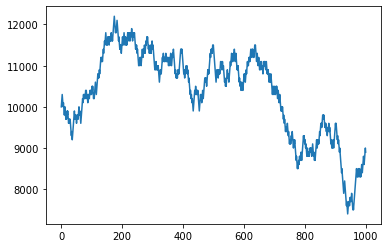

In [20]:
# Ver como evolucionan los fondos de nuestro apostador al jugar 100 veces
# %matplotlib inline
c_capital = apostador2(10000, 100, 1000)
print('El capital al final del juego fue',c_capital[-1]);
plt.plot(c_capital)
plt.show()


### 2. Probar tu función `apostador_nested_f`

El capital al final del juego fue 8900.0


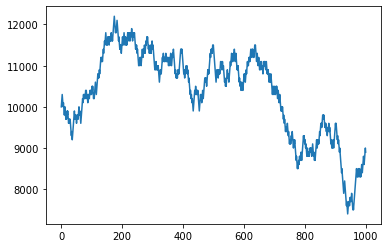

In [21]:
c_capital = apostador_nested_f(10000, 100, 1000)
print('El capital al final del juego fue',c_capital[-1]);
plt.plot(c_capital)
plt.show()

### 3. Probar tu función `apostador_vect`

El capital al final del juego fue 8700


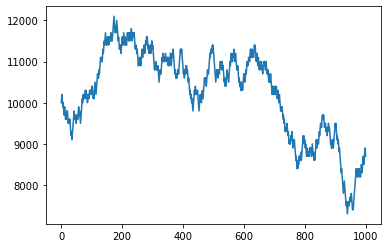

In [17]:
c_capital = apostador_vect(10000, 100, 1000)
print('El capital al final del juego fue',c_capital[-1]);
plt.plot(c_capital)
plt.show()

Ahora vamos a simular 100 escenarios en donde cada apuesta es 100, 50, 100, 1000 y 10000 veces. ¿Qué pasa?

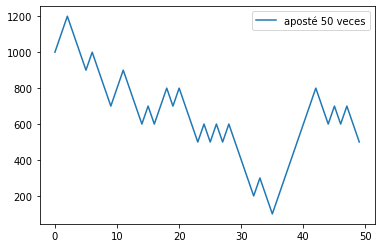

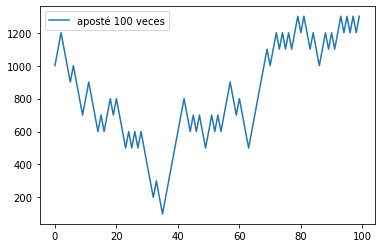

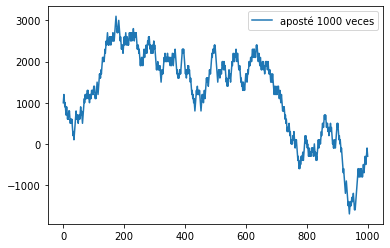

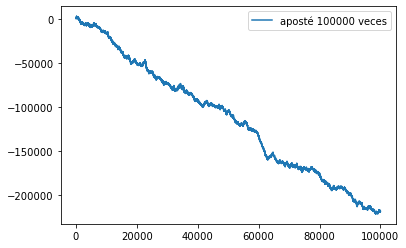

[None, None, None, None]

In [22]:
# (Montecarlo) 
n = [50,100,1000,100000]
capital = 10000
apuesta = 100

# Deseo correr la función creada para cada elemento de la lista n,
# donde el capital es siempre 10000 y la apuesta es 100. 
# Luego quiero graficar el comportamiento de mi capital cuando juego 
def plot_dinero(n):
    plt.plot(apostador_vect(1000,100,n), label=f'aposté {n} veces')
    plt.legend()
    plt.show()

[plot_dinero(ni) for ni in n]

In [24]:
# Graficar histograma para ver el comportamiento del de los fondos para 1000 juegos distintos


Por esto los apostadores pierden. Normalmente las probabilidades no están evidentemente muy en contra de ellos, solo un poco. Los casinos únicamente entienden psicología básica: ganar es extremadamente adictivo. Por ello, los casino se construyen para mantenerte jugando.

En el corto plazo, la mayoría de los jugadores no se dan cuenta que son más propensos a perder. Las veces que ganan y pierden son muy parejas. Estadísticamente, casi la mitad de las personas terminarán con ganancias después de jugar unas pocas veces. El problema es la adicción, y que ellos continuarán apostando, y por ende perdiendo sus ganancias. Es matemática extremadamente básica, pero la psicología humana es débil.

# Ejercicio
**Planteamientodeljuego**

Este juego consiste en tirar un dado dos veces, tanto al jugador como a la banca, anotan la puntuación más alta obtenida. Gana el jugador cuando obtiene mayor puntucación que la banca. Por tanto, la banca gana cuando obtiene un puntuación mayor o igual a la del jugador.


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez and modified by Oscar David Jaramillo Z.
</footer>